# Bisection method

In [14]:
%config InlineBackend.figure_format = 'svg'
from numpy import exp,sin,linspace,sign,abs
from matplotlib.pyplot import figure,plot,grid,xlabel,ylabel

Let us define three different functions for which we will find the root.

In [15]:
def f1(x):
    f = exp(x) - sin(x)
    return f

In [16]:
def f2(x):
    f = x**2 - 4.0*x*sin(x) + (2.0*sin(x))**2
    return f

In [17]:
def f3(x):
    f = x**2 - 4.0*x*sin(x) + (2.0*sin(x))**2 - 0.5
    return f

The following function implements the bisection method. Note that it takes some default arguments.

In [18]:
def bisect(fun,a,b,N=100,eps=1.0e-4,delta=1.0e-4,debug=False):
    fa, fb = fun(a), fun(b)
    sa, sb = sign(fa), sign(fb)
    
    if abs(fa) < delta:
        return (a,0)

    if abs(fb) < delta:
        return (b,0)

    # check if interval is admissible
    if fa*fb > 0.0:
        if debug:
            print("Interval is not admissible\n")
        return (0,1)

    for i in range(N):
        e = b-a
        c = a + 0.5*e
        if abs(e) < eps*abs(c):
            if debug:
                print("Interval size is below tolerance\n")
            return (c,0)
        fc = fun(c)
        if abs(fc) < delta:
            if debug:
                print("Function value is below tolerance\n")
            return (c,0)
        sc = sign(fc)
        if sa != sc:
            b = c
            fb= fc
            sb= sc
        else:
            a = c
            fa= fc
            sa= sc
        if debug:
            print("%5d %16.8e %16.8e %16.8e"%(i+1,c,abs(b-a),abs(fc)))
        
    # If we reached here, then there is no convergence
    print("No convergence in %d iterations !!!" % N)
    return (0,2)

## First function

In [19]:
M     = 100    # Maximum number of iterations
eps   = 1.0e-4 # Tolerance on the interval
delta = 1.0e-4 # Tolerance on the function
a, b  = -4.0, -2.0
r,status = bisect(f1,a,b,M,eps,delta,True)

    1  -3.00000000e+00   1.00000000e+00   1.90907076e-01
    2  -3.50000000e+00   5.00000000e-01   3.20585844e-01
    3  -3.25000000e+00   2.50000000e-01   6.94209267e-02
    4  -3.12500000e+00   1.25000000e-01   6.05288259e-02
    5  -3.18750000e+00   6.25000000e-02   4.61629389e-03
    6  -3.15625000e+00   3.12500000e-02   2.79283147e-02
    7  -3.17187500e+00   1.56250000e-02   1.16471966e-02
    8  -3.17968750e+00   7.81250000e-03   3.51301957e-03
    9  -3.18359375e+00   3.90625000e-03   5.52273640e-04
   10  -3.18164062e+00   1.95312500e-03   1.48021741e-03
   11  -3.18261719e+00   9.76562500e-04   4.63932552e-04
Function value is below tolerance



## Second function

In [20]:
M     = 100    # Maximum number of iterations
eps   = 1.0e-4 # Tolerance on the interval
delta = 1.0e-4 # Tolerance on the function
a, b  = -4.0, -2.0
r,status = bisect(f2,a,b,M,eps,delta,True)

Interval is not admissible



Lets visualize this function.

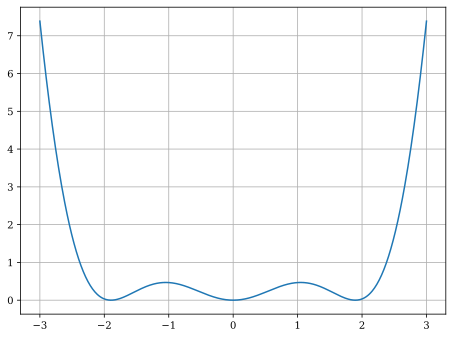

In [21]:
x = linspace(-3,3,500)
y = f2(x)
plot(x,y)
grid(True)

It looks like there are double roots which bisection method cannot compute such roots since the function value does not change around the root !!!

## Third function

In [22]:
M     = 100    # Maximum number of iterations
eps   = 1.0e-4 # Tolerance on the interval
delta = 1.0e-4 # Tolerance on the function
a, b  = -3.0, +2.0
r,status = bisect(f3,a,b,M,eps,delta,True)

    1  -5.00000000e-01   2.50000000e+00   2.89455689e-01
    2  -1.75000000e+00   1.25000000e+00   4.52488254e-01
    3  -2.37500000e+00   6.25000000e-01   4.75412891e-01
    4  -2.06250000e+00   3.12500000e-01   4.10335430e-01
    5  -2.21875000e+00   1.56250000e-01   1.10488056e-01
    6  -2.29687500e+00   7.81250000e-02   1.42093933e-01
    7  -2.25781250e+00   3.90625000e-02   6.27310346e-03
    8  -2.23828125e+00   1.95312500e-02   5.44180845e-02
    9  -2.24804688e+00   9.76562500e-03   2.46591833e-02
   10  -2.25292969e+00   4.88281250e-03   9.34083833e-03
   11  -2.25537109e+00   2.44140625e-03   1.57095736e-03
   12  -2.25659180e+00   1.22070312e-03   2.34178305e-03
   13  -2.25598145e+00   6.10351562e-04   3.83092531e-04
   14  -2.25567627e+00   3.05175781e-04   5.94512219e-04
   15  -2.25582886e+00   1.52587891e-04   1.05854829e-04
Interval size is below tolerance



We dont need to specify all arguments to the function as some of them have default values.

In [23]:
r,status = bisect(f3,a,b,debug=True)

    1  -5.00000000e-01   2.50000000e+00   2.89455689e-01
    2  -1.75000000e+00   1.25000000e+00   4.52488254e-01
    3  -2.37500000e+00   6.25000000e-01   4.75412891e-01
    4  -2.06250000e+00   3.12500000e-01   4.10335430e-01
    5  -2.21875000e+00   1.56250000e-01   1.10488056e-01
    6  -2.29687500e+00   7.81250000e-02   1.42093933e-01
    7  -2.25781250e+00   3.90625000e-02   6.27310346e-03
    8  -2.23828125e+00   1.95312500e-02   5.44180845e-02
    9  -2.24804688e+00   9.76562500e-03   2.46591833e-02
   10  -2.25292969e+00   4.88281250e-03   9.34083833e-03
   11  -2.25537109e+00   2.44140625e-03   1.57095736e-03
   12  -2.25659180e+00   1.22070312e-03   2.34178305e-03
   13  -2.25598145e+00   6.10351562e-04   3.83092531e-04
   14  -2.25567627e+00   3.05175781e-04   5.94512219e-04
   15  -2.25582886e+00   1.52587891e-04   1.05854829e-04
Interval size is below tolerance



## Exercise

We have used a `for` loop to perform the iterations. Modify the code to use `while` loop instead.